In [60]:
# 경고 메시지 무시
import warnings
 
warnings.filterwarnings("ignore")

In [494]:
import pandas as pd

# 데이터 로드
raw = pd.read_excel('data/demisoda_oranC_v4.xlsx')

raw.head(3)

,keyword,category,date,title,username,content,click,link,channel,site
0,EDC 데미소다,default,2019-08-30,푸드투데이 오늘 뉴스 - [이슈점검] 농민 보호 팽개친 농협 하나로마트의 '위험한 ...,푸드투데이,[푸드TV] 국회로 간 4-H 청소년 차세대 리더로 거듭나다[푸드투데이 = 홍성욱 ...,NaN,https://m.blog.naver.com/foodtoday1?Redirect=L...,default,naverBlog
1,EDC 데미소다,default,2019-08-30,[푸드투데이] 동아오츠카 데미소다 ‘EDC KOREA 2019’ 이벤트 진행,푸드투데이,동아오츠카 데미소다 ‘EDC KOREA 2019’ 이벤트 진행[푸드투데이 = 조성윤...,NaN,https://m.blog.naver.com/foodtoday1?Redirect=L...,default,naverBlog
2,EDC 데미소다,default,2019-09-01,동아오츠카 데미소다 EDC코리아 축제 참여,KoreaTourPress,동아오츠카가 데미소다브랜드로 '일렉트릭 데이지 카니발 코리아 2019 개최를 맞아 ...,NaN,https://m.blog.naver.com/tour_bangbang?Redirec...,default,naverBlog


In [495]:
print(raw['keyword'].value_counts())

미린다             630
써니텐             227
펩시 탑텐           107
오란씨 믹스맥스페스티벌     62
환타 헤드            44
EDC 데미소다         27
오란씨 CM송          26
UMF 데미소다         12
Name: keyword, dtype: int64


In [499]:
# 데이터 셋 선택
df = raw.loc[raw['keyword']=='UMF 데미소다'].reset_index(drop = True)

#데이터 확인
print(df["content"].head())
print(df['keyword'].value_counts())

0    ​움프 코리아 2018Day2 후기숙소에서 경기장으로UMF Korea 2018 Da...
1    2019.06.08...​2017울트라뮤직페스티벌 이후 두번째 움프참석이다그것도 하...
2    친구가 구해줘서 우연히 가게된 umf korea!!!이디엠 페스티벌이라고 하길래 아...
3    #ULTRAKOREA #UMF #울트라코리아 #울트라2019#움프 #울트라장소 #에...
4    ​태어나 처음으로 가본 UMF..나는 흥이 많아도 겉으로 표출하는 방식으로 많은 편...
Name: content, dtype: object
UMF 데미소다    12
Name: keyword, dtype: int64


In [500]:
data = df["content"]
data

0     ​움프 코리아 2018Day2 후기숙소에서 경기장으로UMF Korea 2018 Da...
1     2019.06.08...​2017울트라뮤직페스티벌 이후 두번째 움프참석이다그것도 하...
2     친구가 구해줘서 우연히 가게된 umf korea!!!이디엠 페스티벌이라고 하길래 아...
3     #ULTRAKOREA #UMF #울트라코리아 #울트라2019#움프 #울트라장소 #에...
4     ​태어나 처음으로 가본 UMF..나는 흥이 많아도 겉으로 표출하는 방식으로 많은 편...
5     #기장힐튼 #카페친구랑 기장힐튼으로 드라이브💕 기장힐튼엔 쉬는날이라 그런지 차도 엄...
6     올해의 승자는 얼리버드 티켓 취소한 사람들^^계속 갈지말지 며칠을 고민하다가그래도 ...
7     일요일자 umf 티켓을 받아서 벚꽃이랑 놀러갔다!일요일 티켓 봉투는 주황!봉투가 크...
8     안녕 난 새벽달망트라 후기 지금 시작한다​Flo플로 라는 앱의 이벤트를 통해 가게 ...
9     안녕하세요!투엘입니다 :)​오늘은 울트라코리아 (umf)에 대해 소개 해드리면서투엘...
10    안녕하세요 혜마니입니당😝엄청 오랜만에 글을 쓰는거 같네요!!개강하고 알바하고 정신없...
11    ​​​​ 2019년 8월 31 9월 1일 양 일간우리나라에선 처음 열리는 EDC 페...
Name: content, dtype: object

In [501]:
import re

# 텍스트 정제 함수
def preprocessing_text(data):
    url = "(https?://)?(www.)?[a-zA-Z0-9./?=&-_]+[.]?[/][a-zA-Z0-9./?=&-_%]+"
    email = "[-_.+a-zA-Z0-9]+[@].+[.][[a-zA-Z0-9]+|[a-zA-Z0-9]+[.][a-zA-Z0-9]+]"
    
    for i in range(len(data)):
        data[i] = re.sub(url,"", data[i])
        data[i] = re.sub(email,"", data[i])
        data[i] = re.sub("[^가-힣a-zA-Z ]","", data[i])
        data[i] = data[i].lower()
    return data

# 텍스트 정제
clean_text = preprocessing_text(data)
clean_text

0     움프 코리아 day 후기숙소에서 경기장으로umf korea  day 후기  하트시그...
1     울트라뮤직페스티벌 이후 두번째 움프참석이다그것도 하이라이트라고 할 수 있는 두번째 ...
2     친구가 구해줘서 우연히 가게된 umf korea이디엠 페스티벌이라고 하길래 아체육관...
3     ultrakorea umf 울트라코리아 울트라움프 울트라장소 에버랜드스피드웨이 울트...
4     태어나 처음으로 가본 umf나는 흥이 많아도 겉으로 표출하는 방식으로 많은 편이 아...
5     기장힐튼 카페친구랑 기장힐튼으로 드라이브 기장힐튼엔 쉬는날이라 그런지 차도 엄청 많...
6     올해의 승자는 얼리버드 티켓 취소한 사람들계속 갈지말지 며칠을 고민하다가그래도 라인...
7     일요일자 umf 티켓을 받아서 벚꽃이랑 놀러갔다일요일 티켓 봉투는 주황봉투가 크고 ...
8     안녕 난 새벽달망트라 후기 지금 시작한다flo플로 라는 앱의 이벤트를 통해 가게 된...
9     안녕하세요투엘입니다 오늘은 울트라코리아 umf에 대해 소개 해드리면서투엘디자인이 참...
10    안녕하세요 혜마니입니당엄청 오랜만에 글을 쓰는거 같네요개강하고 알바하고 정신없었답니...
11     년 월  월 일 양 일간우리나라에선 처음 열리는 edc 페스티벌에 다녀왔다정식 명...
Name: content, dtype: object

In [502]:
# 형태소 분석기 Mecab
from konlpy.tag import Mecab
mecab = Mecab()

# mecab.morphs(clean_text[0])

# 명사만 추출
# mecab.nouns(data)

# 품사 포함 추출
# mecab.pos(clean_text[0],flatten=True)

# 형태소 분석
from tqdm import tqdm

tot_sen = []

for i in tqdm(range(len(clean_text))):
    sen = mecab.nouns(clean_text[i])
    sen = [word for word in sen if len(word) > 1] #1글자 이상만 추출
    tot_sen.append(sen)

tot_word = tot_sen

#tot_sen[0]

100%|██████████| 12/12 [00:00<00:00, 257.82it/s]


In [503]:
# # 품사 선택 
# tot_word = []
# for sentence1 in tot_sen:
#     for word, tag in sentence1:
#         if tag in ['NNP','NNG', 'VV', 'VA']:
#             tot_word.append(word)
            
# tot_word[:30]

In [514]:
# 바꾸기
clean_noun = [[re.sub('^동아$','동아오츠카',noun_) for noun_ in nouns] for nouns in tot_word]
clean_noun = [[re.sub('^플라$','나플라',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^식품$','종합식품기업',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^체리$','체리콕',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^한정$','한정판매',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^이디$','이디엠',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^엑스$','엑스레이티드',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^놀이$','놀이기구',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^메인스$','메인스테이지',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^루트$','앱솔루트',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^디자인$','투엘디자인',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^그루비$','그루비룸',noun_) for noun_ in nouns] for nouns in clean_noun]
clean_noun = [[re.sub('^마틴$','마틴게릭스',noun_) for noun_ in nouns] for nouns in clean_noun]


# 제거
clean_noun = [[noun_ for noun_ in nouns if noun_ != "사람"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "월일"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "사진"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "판매"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "선택"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "옵션"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "화질"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "출처"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "가격"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "머리"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "장소"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "오란씨"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "생각"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "재생"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "오츠카"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기업"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "연락"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "페스티벌"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "진행"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기자"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "배란"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "울트라"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "코리아"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "기댕이"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "일차"] for nouns in clean_noun]
clean_noun = [[noun_ for noun_ in nouns if noun_ != "마니"] for nouns in clean_noun]



# 불용어 삭제
f = open("data/stopwords_list.txt", 'r',encoding='CP949')
line = [line.rstrip() for line in f.readlines()]

for i in range(len(line)):
    clean_noun = [[noun_ for noun_ in nouns if noun_ != line[i]] for nouns in clean_noun]

In [515]:
# 단어 카운트 함수
def count_noun(data):
    t_noun = list()
    
    for _ in data:
        t_noun.extend(_)
    
    t_noun_s = pd.DataFrame(t_noun, columns=['word'])
    t_noun_f = t_noun_s.groupby('word').size().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True)
    
    return t_noun_f

# 단어 카운트
frq_noun = count_noun(clean_noun)
frq_noun[:30]

,word,count
0,부스,65
1,후기,22
2,카드,21
3,현대,19
4,무대,18
5,스테이지,18
6,앱솔루트,16
7,에버랜드,15
8,금요일,15
9,투엘디자인,14


In [516]:
# 자료 형태 변환하기
clean_noun_unlist = [[" ".join(nouns)] for nouns in clean_noun]
clean_noun_sr = preprocessing_text(pd.Series(clean_noun_unlist).astype(str))
clean_noun_sr

0     후기 숙소 경기장 후기 하트 시그널 정재호 이규빈 갈란 티스 제드 숙소 셀카 삼인 ...
1     뮤직 이후 참석 하이라이트 상당 아티스트 타임 테이블 수정 월드 클래스 테러 위험 ...
2     친구 디엠 체육관 노래 기대 마음 셔틀버스 용인 용인 에버랜드 스피드웨이 꺄오 음악...
3     에버랜드 스피드웨이 뮤직 버츄얼 셀프 마틴게릭스 릭스 티켓 부스 앰버 활동 와우 느...
4     처음 가본 표출 방식 친구 전날 학부모 학부모 찬스 공짜 티켓 토요일 용인 스피드웨...
5     기장 힐튼 카페 친구 기장 힐튼 드라이브 기장 힐튼 이름 카페 커피 주말 휴일 최고...
6     올해 승자 얼리 버드 티켓 취소 며칠 고민 라인업 프리미어 말무 마틴게릭스 게릭 라...
7     일요 일자 티켓 벚꽃 일요일 티켓 봉투 주황 봉투 밴드 가이드북 향수 우산 개봉 담...
8     새벽 트라 후기 플로 이벤트 음악 플로 라인업 마틴게릭스 릭스 스크릴렉스 스웨디시 ...
9     투엘 소개 투엘 투엘디자인 참여 부스 소개 세계 요년 뮤직 명칭 미국 마이애미 세계...
10    오랜만 개강 포스팅 내용 후기 올해 기대 얼리 버드 구매 반년 올해 마지막 투어 차...
11    일간 우리나라 정식 명칭 브랜드 처음 한국 개최 외국 대표 자리 컨셉 카니발 페스 ...
dtype: object

In [517]:
import numpy as np

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0).fit(frq_noun)

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(clean_noun_sr)
max_value = A_tfidf_sp.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
tfidf_dict = np.array(tfidf.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[:50]])
print("가장 높은 tfidf를 가진 특성:\n", tfidf_dict[sorted_by_tfidf[-50:]])

가장 낮은 tfidf를 가진 특성:
 ['포토' '내년' '주류' '데미소다' '입구' '음악' '구매' '셀카' '카카오' '나름' '거리' '분위기' '인기' '버드'
 '레드불' '버스' '운영' '노래' '도착' '네온' '처음' '용인' '느낌' '얼굴' '하늘' '축제' '메인' '테이지'
 '몬스터' '화장실' '수정' '기분' '스피드웨이' '스트레스' '한잔' '공짜' '그거' '티머니' '타임' '반입' '입장'
 '기대' '친구' '투엘' '참여' '현대' '앱솔루트' '티켓' '뮤직' '검사']
가장 높은 tfidf를 가진 특성:
 ['정도' '공연장' '전체' '스타' '행사' '구입' '셔틀버스' '카드' '에버랜드' '메인스테이지' '서울랜드' '레이티'
 '오빠' '라인업' '바람' '작년' '중간' '마지막' '자몽' '엑스레이티드' '팔찌' '칵테일' '기장' '날씨' '첫째'
 '이용' '언니' '잠실' '마틴게릭스' '올해' '블랙' '스크릴렉스' '공연' '스테이지' '핫도그' '커플' '트라'
 '게이트' '앰버' '쿠폰' '무대' '그루비룸' '취소' '카페' '투엘디자인' '후기' '일상' '부스' '금요일' '숙소']


#### 선택 (골라골라~

1)

In [518]:
# TF-IDF 낮은 단어 제거 (선택)
no_low = [[noun_ for noun_ in nouns if noun_ not in list(tfidf_dict[sorted_by_tfidf[:50]])] for nouns in clean_noun]
frq_noun = count_noun(no_low)
frq_noun[:10]

,word,count
0,부스,65
1,후기,22
2,카드,21
3,스테이지,18
4,무대,18
5,금요일,15
6,에버랜드,15
7,투엘디자인,14
8,칵테일,11
9,언니,11


2)

In [519]:
# TF-IDF 높은 단어 (선택)
top_list = list(tfidf_dict[sorted_by_tfidf[-50:]])
top_idf = pd.DataFrame(data={'word':top_list})
frq_noun = pd.merge(top_idf, frq_noun, how='left', on='word').sort_values(['count'], ascending=False).reset_index(drop=True)
frq_noun[:10]

,word,count
0,부스,65
1,후기,22
2,카드,21
3,스테이지,18
4,무대,18
5,금요일,15
6,에버랜드,15
7,투엘디자인,14
8,칵테일,11
9,언니,11


In [520]:
word_dict = dict()
for i in range(30):
    word_dict[frq_noun['word'][i]] = frq_noun['count'][i]
word_dict

{'부스': 65,
 '후기': 22,
 '카드': 21,
 '스테이지': 18,
 '무대': 18,
 '금요일': 15,
 '에버랜드': 15,
 '투엘디자인': 14,
 '칵테일': 11,
 '언니': 11,
 '엑스레이티드': 10,
 '게이트': 9,
 '그루비룸': 9,
 '메인스테이지': 9,
 '오빠': 9,
 '잠실': 9,
 '셔틀버스': 9,
 '일상': 9,
 '팔찌': 8,
 '올해': 8,
 '자몽': 8,
 '서울랜드': 8,
 '마지막': 7,
 '중간': 6,
 '공연': 6,
 '스크릴렉스': 6,
 '마틴게릭스': 6,
 '숙소': 6,
 '커플': 5,
 '핫도그': 5}

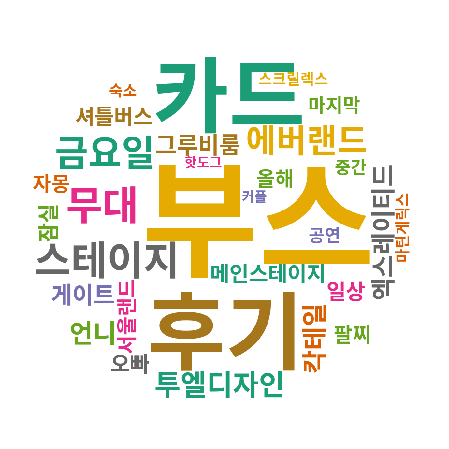

In [538]:
from wordcloud import WordCloud
from PIL import Image
import requests
import matplotlib.pyplot as plt

font_path = 'data/NotoSansCJKkr-Bold.otf'
url = 'https://banner2.cleanpng.com/20180328/soe/kisspng-circle-blue-shape-ball-clip-art-blue-5abb7206ab0a24.8045066715222338627006.jpg'

mask = np.array(Image.open(requests.get(url, stream=True).raw))

%matplotlib inline
wc = WordCloud(font_path = font_path,
               min_font_size = .5,
               colormap = 'Dark2',
               background_color='white', 
               width=800,
               height=800,
               mask = mask)

cloud = wc.generate_from_frequencies(word_dict)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)